# Aerial Aid Drop Problem

An aid plane, about to release a package of supplies, suffers a malfunction of its targeting computer.
The pilot notices that there is a strong horizontal wind, so they decide to release the package anyway,
directly over the visually sighted target, as the plane flies directly into the wind.
The pilot calculates the required ground speed of the aircraft for their flying altitude of $50,000$
feet and realizes that there is no problem flying the craft at that speed. They are confident that
the wind speed will offset the plane’s speed and blow the package “backwards” onto the intended
target. The pilot adjusts the ground speed of the aircraft accordingly and releases the package at
the precise moment the target appears directly below the aircraft in their visual targeting device.

Assume that the wind is blowing horizontally throughout the entire space below the aircraft with
a speed of $60$ mph, and that the air density does not vary with altitude. The package has a mass
of $100$ kg and is roughly spherical in shape ($C_d = 0.47$) with a radius of $0.2$ m.

<b>Ground speed</b> is the speed of the aircraft relative to the ground.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

alt = 50000 * 0.3048 #altitude [m]
v_wind = 60 * 0.44704 #horizontal wind speed [m/s]
m = 100 #package mass [kg]
Cd = 0.47 #drag coefficient
r = 0.2 #radius [m]
g = 9.81 #acceleration due to gravity [m/s^2]

/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7781/3212077632.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


## Part A
Calculate the required ground speed of the aircraft if the package is to land at the target.

In [14]:
pair = 1.225 #assumed air density [kg/m^3]
A = np.pi * r**2 #cross sectional area of sphere [m^2]

c2 = 0.5 * Cd * A * pair
a = -c2/m
b = -g

In [16]:
# the function defining the right-hand sides of the ODEs
def dz_dt(z, t, a, b, vw):
    x, xdot, y, ydot = z
    Fd = a * np.sqrt((xdot + vw)**2 + ydot**2)
    dzdt = [xdot, (xdot + vw) * Fd, ydot, b + ydot * Fd]
    
    return dzdt

In [20]:
def get_v(t, offset):
    v_max = v_wind * 10 #upper bound of speed
    v_min = 0 #lower bound of speed
    while v_max-v_min > 0.001:
        v_guess = (v_min + v_max)/2
        y0 = [0.0, v_guess, alt, 0.0]
        sol = odeint(dz_dt, y0, t, args=(a, b, v_wind))
        
        h = sol[0,2]
        k = 0
        while h > 0:
            k += 1
            h = sol[k,2]
            
        k += 2
        d = sol[k,0]
        
        if abs(d+offset) < 0.01: break;
        elif (d+offset) > 0: v_max = v_guess;
        else: v_min = v_guess;
            
    return v_guess, d
    
t = np.linspace(0, 1000, 10000)
v_guess, d = get_v(t, 0.)
print(f'v_guess = {round(v_guess, 3)}m/s, d = {round(d, 3)}m')

v_guess = 113.27m/s, d = 0.01m


## Part B

Plot the trajectory of the package as it falls. Explain why the “trailing side” of the trajectory
appears linear.

In [24]:
y0 = [0.0, v_guess, alt, 0.0]
sol = odeint(dz_dt, y0, t, args=(a, b, v_wind))

h = sol[0,2] # the height
k = 0 # an index
while h > 0.:
    k += 1
    h = sol[k,2]
    
k += 2

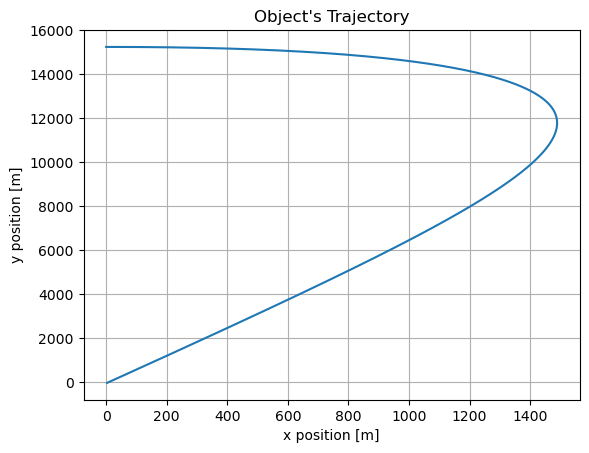

In [26]:
plt.plot(abs(sol[0:k, 0]), sol[0:k,2])
plt.title("Object's Trajectory")
plt.xlabel("x position [m]")
plt.ylabel("y position [m]")
plt.grid()

Since the change horizontal position is dependent on the drag force, at some point the object will
reach its horizontal terminal velocity after which it doesn’t accelerate. This means the object
stabilizes with the wind velocity and will move horizontally at a constant rate dictated by it. This
constant rate results in a linear trajectory

## Part C

Determine how precisely the pilot must control the speed of the aircraft if the package is to
land within 100 meters of the target.

In [30]:
v_min, d = get_v(t, 100)
print(f'For v = {round(v_min, 3)} m/s the object returns {round(d,3)} m')

v_max, d = get_v(t, -100)
print(f'For v = {round(v_max, 3)} m/s the object returns {round(d,3)} m')

print(f'\nSo the pilot must control the speed to a precision of ±{round((v_max-v_min)/2, 3)} m/s')

For v = 106.293 m/s the object returns -100.0 m
For v = 120.459 m/s the object returns 99.999 m

So the pilot must control the speed to a precision of ±7.083 m/s
